## <u>Predicting Loan Approval using a Decision Tree Classifier</u>

### 1. Importing Data

In [1]:
#importing pandas library to enable use of dataframes
import pandas as pd

df1 = pd.read_excel("Zappy Loan Data.xlsx") #reading and labelling relevant file
df1.head() #displaying the contents of relevant xlsx file

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [1]:
#importing tabula to allow coversion of pdf into a csv file

import tabula as tb

dfc = tb.convert_into(r'C:\Users\Amin\Documents\Python Scripts\Zappy Loans Assignment\Loans_Database_Table.pdf', "Loans_Database_Table.csv", output_format="csv", pages='all')


Got stderr: Jun 11, 2021 4:41:03 PM org.apache.pdfbox.contentstream.operator.graphics.ClosePath process
Jun 11, 2021 4:41:04 PM org.apache.pdfbox.contentstream.operator.graphics.ClosePath process
Jun 11, 2021 4:41:04 PM org.apache.pdfbox.contentstream.operator.graphics.ClosePath process
Jun 11, 2021 4:41:04 PM org.apache.pdfbox.contentstream.operator.graphics.ClosePath process
Jun 11, 2021 4:41:04 PM org.apache.pdfbox.contentstream.operator.graphics.ClosePath process
Jun 11, 2021 4:41:04 PM org.apache.pdfbox.contentstream.operator.graphics.ClosePath process
Jun 11, 2021 4:41:06 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider loadDiskCache
Jun 11, 2021 4:41:06 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 11, 2021 4:41:09 PM org.apache.pdfbox.pdmodel.font.FileSystemFontProvider <init>
Jun 11, 2021 4:41:09 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jun 11, 2021 4:41:09 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Jun 11, 2021 4:41:09

In [3]:
# assigning csv file to a variable
df2 = pd.read_csv(r'C:\Users\Amin\Documents\Python Scripts\Zappy Loans Assignment\Loans_Database_Table.csv')
df2

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2265,1,1,2,0,0,1993,1625.0,113,180,1,2,Y
394,2266,1,1,2,1,0,3100,1400.0,113,360,1,1,Y
395,2272,1,1,2,1,0,3276,484.0,135,360,0,2,Y
396,2277,2,0,0,1,0,3180,0.0,71,360,0,1,N


### 2. Perparing and Cleaning

In [4]:
#concatenating dataframes with reset_index function to ensure unique row IDs are generated
concat = pd.concat([df2,df1]).reset_index(drop=True)
concat

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
641,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
642,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
643,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y


In [5]:
#Assessing whether there are any null values in the dataframe
concat.isnull()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,False,False,False,False,False,False,False,False,False,False,False,False,False
641,False,False,False,False,False,False,False,False,False,False,False,False,False
642,False,False,False,False,False,False,False,False,False,False,False,False,False
643,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#Summing all notnull values to ensure no data is missing within the dataframe and that it totals 645 for each column
concat.notnull().sum()

Loan_ID              645
Gender               645
Married              645
Dependents           645
Graduate             645
Self_Employed        645
ApplicantIncome      645
CoapplicantIncome    645
LoanAmount           645
Loan_Amount_Term     645
Credit_History       645
Property_Area        645
Loan_Status          645
dtype: int64

In [8]:
#removing columns that are not pivotal in determining loan approval
dfdrop = concat.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount',
       'Loan_Amount_Term','Loan_ID'], axis=1)

dfdrop.head()

,Gender,Married,Dependents,Graduate,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,1,1,Y
1,1,1,1,1,0,1,3,N
2,1,1,0,1,1,1,1,Y
3,1,1,0,0,0,1,1,Y
4,1,0,0,1,0,1,1,Y


In [9]:
#Exporting into an Excel file name 'Concat_DataSet' using the ExcelWriter function
exportconcat = pd.ExcelWriter("Concat_DataSet.xlsx",engine='xlsxwriter')
#Specifying the dataframe to be exported and the sheet
concat.to_excel(exportconcat, sheet_name='Sheet1')
#saving the exported Excel file containing the concatenated dataset
exportconcat.save()

In [10]:
# importing LabelEncoder to assign Loan_Status column numerical values of 0 and 1 instead of Y and N
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#using  ffit_transform to fit label encoder and return the encoded labels
dfdrop['Loan_Status'] = le.fit_transform(dfdrop['Loan_Status'])

In [11]:
dfdrop.describe() # output of data statistics

,Gender,Married,Dependents,Graduate,Self_Employed,Credit_History,Property_Area,Loan_Status
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1.186047,0.648062,0.731783,0.784496,0.130233,0.776744,1.959690,0.688372
std,0.389446,0.477945,1.002015,0.411491,0.336820,0.416752,0.789048,0.463518
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000
max,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [12]:
from sklearn.model_selection import train_test_split #importing test train split module

In [66]:
# splitting the data in features and target set 
x = dfdrop.drop(['Loan_Status'], axis=1) # these are the features, all columns excluding Loan_Status
y= dfdrop['Loan_Status'] # This is the target set i.e. the output that is to be predicted

# splitting the arrays and assigning test_size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0) 

### 3. Exploratory Data Analysis (EDA)

In [43]:
# Percentage of female applicants that had their loans approved
approvedf = 0   #setting variables to zero
totalf=0
for i,z in zip(dfdrop['Gender'], dfdrop['Loan_Status']): # going through each item in gender and loan status columns respectively
    if i == 2 and  z == 1:   # setting parameter requirement for adding 1 to the number of approved female applicants
        approvedf += 1
    if i==2:                 #setting parameter requirement for counting total number of females
        totalf+=1
       
percentapproved = (approvedf/totalf)*100  #calculating percent of females approved

print('Percentage of female applicants that had their loans approved:', percentapproved)

Percentage of female applicants that had their loans approved: 66.66666666666666


In [16]:
#populating the notebook with numpy and matplotlib
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


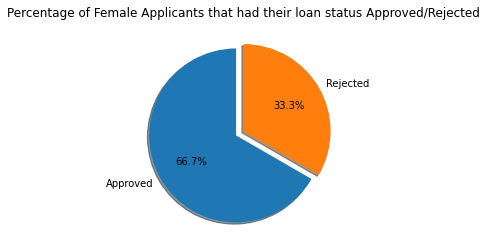

In [17]:
#plotting percentage of female applicants that had their loan status approved/rejected
labels='Approved', 'Rejected'

plt.pie([percentapproved,100-percentapproved],labels=labels, autopct='%1.1f%%', shadow=True,startangle=90, explode=(0.1,0))
plt.title('Percentage of Female Applicants that had their loan status Approved/Rejected')
plt.show()

In [45]:
#Average applicant income
avgappinc=float("%.2f" % (concat['ApplicantIncome'].mean()))
print('The average applicant income is: £',avgappinc)

The average applicant income is: £ 5365.59


In [46]:
#Average income of self employed applicant
selfemp = 0     #setting variables to 0
totappinc = 0

# going through each item in ApplicantIncome and Slelf_Employed columns respectively
for i,z in zip(concat['ApplicantIncome'],concat['Self_Employed']):  
    if z == 1:         # setting parameter requirement for adding 1 to the number of self employed applicants
        selfemp += 1   
        totappinc += i  # summing total salary of all self-employed applicants

avgseinc = float("%.2f" % (totappinc/selfemp))
print('The average income of self-employed applicants is: £',avgseinc)

The average income of self-employed applicants is: £ 7284.29


In [47]:
#Average income of applicants that are not self-employed (same code as above)
notse = 0
nonseinc = 0
for i,z in zip(concat['ApplicantIncome'],concat['Self_Employed']):
    if z == 0:
        notse += 1
        nonseinc += i
        
avgnonse = float("%.2f" % (nonseinc/notse))
print('The average income of not self-employed applicants is: £',avgnonse)

The average income of not self-employed applicants is: £ 5078.3


In [48]:
#Average income of grad applicants
grad = 0
gradinc = 0
for i,z in zip(concat['ApplicantIncome'],concat['Graduate']):
    if z == 1:
        grad += 1
        gradinc += i
        
avggradinc = float("%.2f" % (gradinc/grad))
print('The average income of graduate applicants is: £',avggradinc)

The average income of graduate applicants is: £ 5809.92


[]

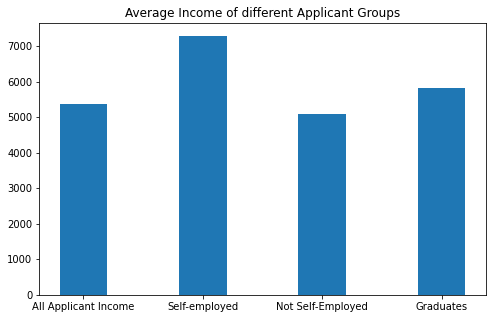

In [22]:
#plotting the average incomes of different applicant groups on a bar chart
xavg=['All Applicant Income', 'Self-employed', 'Not Self-Employed', 'Graduates'] # x variables
yavg=[avgappinc,avgseinc,avgnonse,avggradinc] # y variables

plt.subplots(figsize=(8,5))
plt.bar(xavg,yavg,width=0.4)
plt.title('Average Income of different Applicant Groups')
plot()

In [49]:
#Percentage of graduate applicates that had their loans approved (same code as female applicants percentage approved calculation)
approvedg = 0
totalg=0
for i,z in zip(dfdrop['Graduate'], dfdrop['Loan_Status']):
    if i == 1 and  z == 1:
        approvedg += 1
    if i==1:
        totalg += 1
        
percentappgrads = (approvedg/totalg)*100

print('Percentage of graduate applicants that had their loans approved:', percentappgrads)

Percentage of graduate applicants that had their loans approved: 71.14624505928853


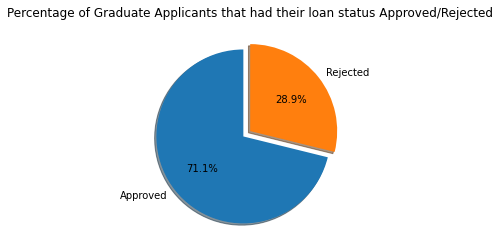

In [24]:
# plotting the percentage of graduate loan applicants approved/rejected
labels='Approved', 'Rejected'

pyplot.pie([percentappgrads,100-percentappgrads],labels=labels, autopct='%1.1f%%', shadow=True,startangle=90, explode=(0.1,0))
pyplot.title('Percentage of Graduate Applicants that had their loan status Approved/Rejected')
pyplot.show()

C:\Users\Amin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<AxesSubplot:xlabel='ApplicantIncome'>

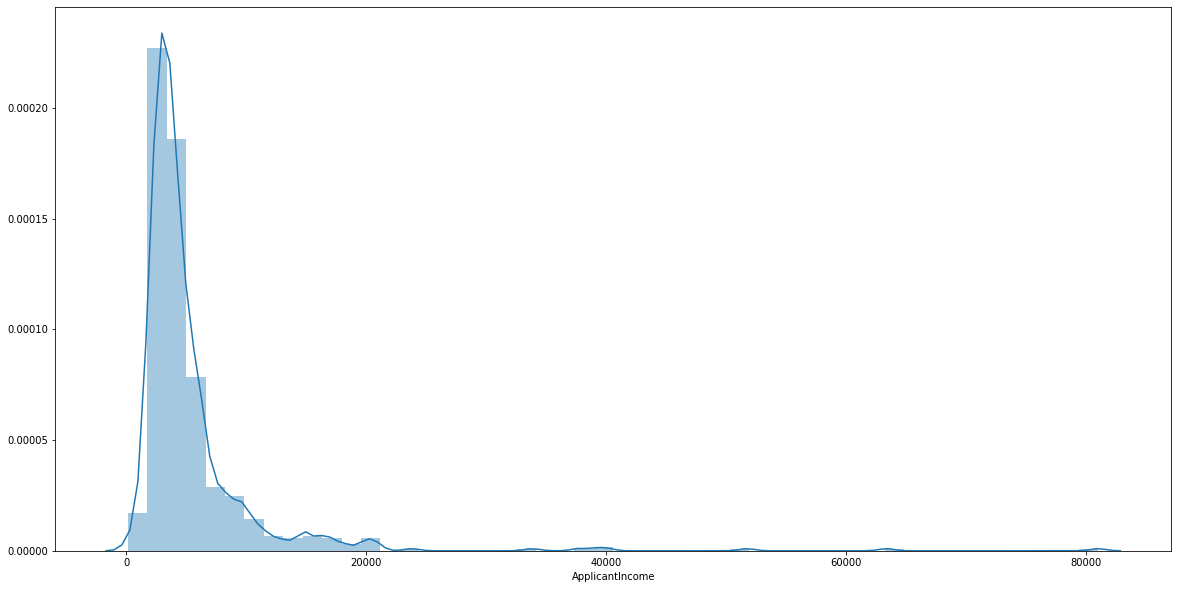

In [25]:
#importing seaborn environment
# histogram plot to show distribution in applicant income
import seaborn as sns
pyplot.subplots(figsize=(20,10))
sns.distplot(concat['ApplicantIncome'])

### 4. Relationship Analysis

In [27]:
#labelling df
corrdata = dfdrop.drop(['Loan_Status'],axis=1)

[]

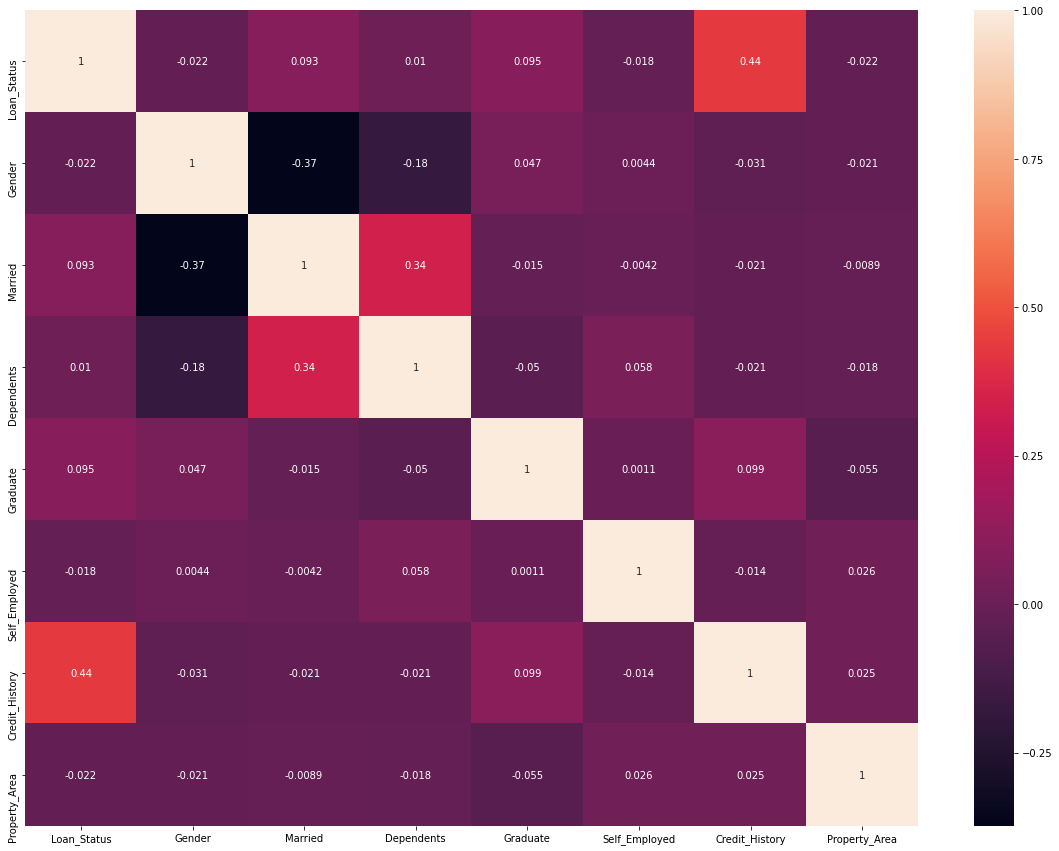

In [28]:
#correlation between loan approval and all the other features included using the .corr() function and heatmap plot
correlation = pd.concat([dfdrop['Loan_Status'],corrdata], axis=1).corr()
pyplot.subplots(figsize=(20,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)
plot()

<i>Heatmap 1.1 - The correlation matrix above shows a weak correlation between Loan approval and the feature variables, except for Credit History, which understandably is a determining factor in approving one's loan.</i>

[]

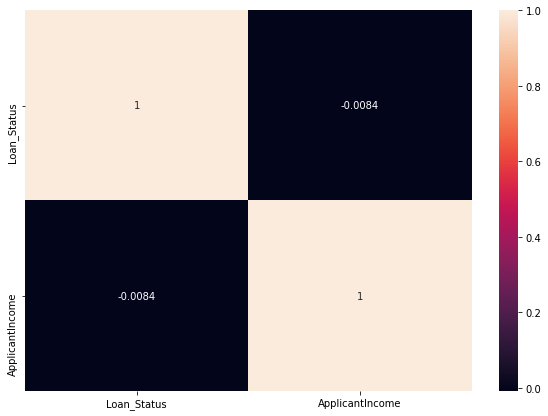

In [29]:
#correlation between Loan status and applicant income
correlation2 = pd.concat([dfdrop['Loan_Status'],concat['ApplicantIncome']], axis=1).corr()
pyplot.subplots(figsize=(10,7))
sns.heatmap(correlation2, xticklabels=correlation2.columns, yticklabels=correlation2.columns,annot=True)
plot()

<b>Potential bias and ethical implications of the model</b>

With the increased availability and development of Big Data, concerns regarding the presence of bias within an algorithm become apparent. Biases in algorithms will arise a results of existing biases that are perpetuated through the input data. Certain metrics used in Big Data techniques may simply reflect the result of correlations and not causations. In cases such as loan approvals where ambiguous correlation may directly impact the life of a consumer, it is important to determine the causation behind each individual variable and establish a link in order to justify its use in loan apporvals. Given these implications, the dicussion surronding the use of data becomes imminent in being able to provide bias free services through Buig Data.

An alternative form of data type, dubbed as 'unobtrusive measures', is collated based on observed behaviours of the consumers without direct participation by the individual (Petrasic, 2020). These measures are subsequently used to predict related variables. An example of an obtrusive measure studied in a 1966 social science textbook highlights that the wear patterns on the floor of a museum could be used to determine the most popular exhibits (Petrasic, 2020). In the case of loan approvals, obtrusive measures could come in the form of consumer data related to the product purchases, internet history, or even what ads they may be tageted by on social media. Models based on obtrusive measures rely heavily on the inference of the data. A large inference gap means that there is a significant mismatch between the observation and understading of the variables. Ultimately, this could lead into a dysfunctional predictive model.

With the Zappy Loans model, there is little room for potential bias. The first column of Heatmap 1.1 is a display of the correlation between Loan_Status and the feature variables. Out of the 7 variables, 4 seem to show a significantly low correlation (<0.05) and 2 show a correlation between 0.05-0.1. This means that the predictive model is very unlikely to have bias towards gender, self-employment, property area, and whether the applicant has dependents. However, overall the data does display a correlation close to 0.1 for applicants that are married and are graduates, which could lead to a favourable bias towards those individuals. Ultimately, the largest determining factor is the credit history of the applicant, which arguably is directly correlated to one's ability to pay back the loan, hence is highly correlated to loan approval at 0.44. Therefore this variable can be discounted as a potential form of bias.

### 5. Predictive Analysis

<b>Model and Approach</b>

This model uses a decision tree classifier to predict the loan approval outcome. Decision trees are predictive models that use a set of binary rules to calculate a target value. Each tree consists of branches, leaves, and nodes that ultimately determine the output given a set of inputs. The features are the input values of the model, 20% of which are used for the testing against and the remaining 80% as training data for the model.

The model functions by asking a set of questions to eventually reach a prediction. During the training phase the model will take data (80% of the feature data provided) and map each case against the output (loan status). This allows the model to learn and pick up the relationships between the data and the target variable. During the testing phase, a test set of data is given to the model (20% of the feature data) and a prediction of the target variable is made based on the outcome of the training data.

<u>Advantages</u>
1. Particularly useful in predicting non linear relationship between data
2. Can be used to predict the outcome of both numerical and categorical variables i.e. no data type constaints
3. The data is less influenced by outliers due to the nature of the True/False decision process the predictive model uses
4. One of the fastest ways to identify significant variables and build a predictive model given a dataset

<u>Disadvantages</u>
1. Overfitting of the training dataset - less accurate at predicting testing datasets
2. Cannot be used for extrapolation due to the nature of the feature and target variables
3. The predictive model can be heavily skewed with small variations in the data, especially if there are no strong correlations between data
4. Unable to make accurate predictions if the data provided is unrelated

In [67]:
# importing decision tree classifier module from sklearn
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()  #labelling DTC
classifier.fit(x_train, y_train)  # fitting the DTC to the training data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
y_pred = classifier.predict(x_test) # predicting Loan Status results based on the testing variables
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [69]:
# table showing the output of actual results vs the predicted results
dft=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dft.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")

,Actual,Predicted,Count
0,0,0,21
1,0,1,23
2,1,0,8
3,1,1,77


In [70]:
# importing metrics to output statistics based on the results of the predicted output
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24031007751937986
Mean Squared Error: 0.24031007751937986
Root Mean Squared Error: 0.49021431794612025


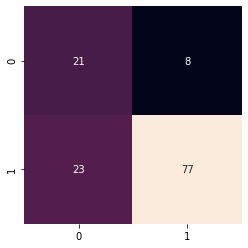

In [82]:
# plotting confusion matrix to visually display the matching between the actual and predicted results
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=True, yticklabels=True)
plt.xlabel=('Actual')
plt.ylabel=('Predicted')

In [72]:
#Decision Tree Accuracy
correct=0  # setting variable to 0
for i,j in zip(dft['Actual'], dft['Predicted']): #going through items in Actual and Predicted outputs in the dataframe
    if i==j:            # setting requirement for a given prediction to be correct
        correct +=1
    else:
        pass
    
dtacc = (correct/len(dft))*100  #calculating the percentage of predictions that were correct
print('The accuracy of the model is:',dtacc,'%')

The accuracy of the model is: 75.96899224806202 %


<b>Findings and Discussion</b>

The findings suggest that the category with the highest accuracy prediction are people that were approved for a loan. A total of 77 out of the 85 people (90.6%) approved for a loan, within the test set, were predicted correctly. On the contrary, loan rejection prediction observed 21 out of the 44 (47.3%) people being predicted correctly as rejectees. This brings the average accuracy of the model to approximately 76.0%. The implications of the lack of accuracy means that the model would overly approve unqualified applicants. In practice this could be highly detrimental to the loan provider as poor customer credentials is likely to result in an inability of the clients to pay back the loan. On the contrary, overly predicting loan rejections and under predicting loan approvals would not prove to be as detrimental to a business as it would only result in a greater opportunity cost, where customers that had the credentials for approval were not approved. Therefore, using this model with these specified input variables is to results in the worst case scenario for a loans business, as it could result in up to 23% of approved applicants unable to pay back their loan. Unaccounted lost revenue could quickly lead to insolvency. Ultimately, the feature data is skewed in the favour of predicting loan approvals as opposed to rejections.

Improving the model should consist of a further restriction of the feature variables. As displayed in heatmap 1.1, there is little correlation between most of the feature variables to the target variable. A major disadvantage of decision tree models is the failure to predict outcomes that show little relationship in the data, thus removal of the least correlated feature variables such as 'dependents' and 'self employment' could increase the accuracy of the model by a significant extent.


# Bibliography

1. Petrasic, K., 2020. Algorithms And Bias: What Lenders Need To Know | Lexology. [online] Lexology.com. Available at: <https://www.lexology.com/library/detail.aspx?g=c806d996-45c5-4c87-9d8a-a5cce3f8b5ff> [Accessed 29 December 2020].


2. Drakos, G., 2019. Decision Tree Regressor Explained In Depth. [online] GDCoder. Available at: <https://gdcoder.com/decision-tree-regressor-explained-in-depth/> [Accessed 2 January 2021].